## PROYECTO FINAL MATEMÁTICAS ESPECIALES

### CALCULADORA PARA PARACAÍDAS EN FORMA CRUZ UTILIZANDO DATOS DE TELEMETRÍA DE DROPTEST CON LA TRANSFORMADA RÁPIDA DE FOURIER

Para evaluar el rendimiento de un paracaídas, se realizan pruebas experimentales conocidas como droptests, las cuales permiten observar el comportamiento dinámico del sistema durante la caída y, en particular, identificar su velocidad terminal una vez que se alcanza un equilibrio entre las fuerzas de arrastre y gravedad.

Los datos usados en este trabajo fueron obtenidos a partir de un diseño preeliminar de paracaídas con forma de cruz seleccionada previamente con una matriz de selección, con el fin de calcular el coeficiente de arrastre ($C_d$) de este y usarlo para el diseño del paracaídas final. Los datos de telemetría fueron obtenidos por medio de un altímetro y un acelerómetro SRAD, a través de un droptest con un drone a una altura de aproximadamente 220 metros, con el fin de darle tiempo al paracaídas de que se estabilice.

### **Objetivos del Ejercicio:**

Utilizaremos datos reales de altitud vs tiempo para:
1.  Obtener la velocidad en cada instante del vuelo.
2.  Calcular la velocidad terminal en el rango del vuelo con paracaídas.
3.  Comparar ambos resultados con el fin de determinar qué método resultó ser más apropiado para el diseño final del paracaídas.


In [1]:
#Importar librerias
import pandas as pd
import numpy as np
from scipy.signal import savgol_filter
import matplotlib.pyplot as plt

In [2]:
#Crear dataframe
df = pd.read_csv("Datos5.csv", sep=",", encoding="latin1")
print(df.columns)

Index(['Altitude [m]', 'Time [s]'], dtype='object')


In [3]:
#Extraer valores
altitude = df['Altitude [m]']
Time = df['Time [s]']

C:\Users\armad\AppData\Local\Temp\ipykernel_20744\3969834746.py:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ko" (-> color='k'). The keyword argument will take precedence.
  plt.plot(Time, altitude, "ko", mew = 0.5, mfc = "w", color="red")


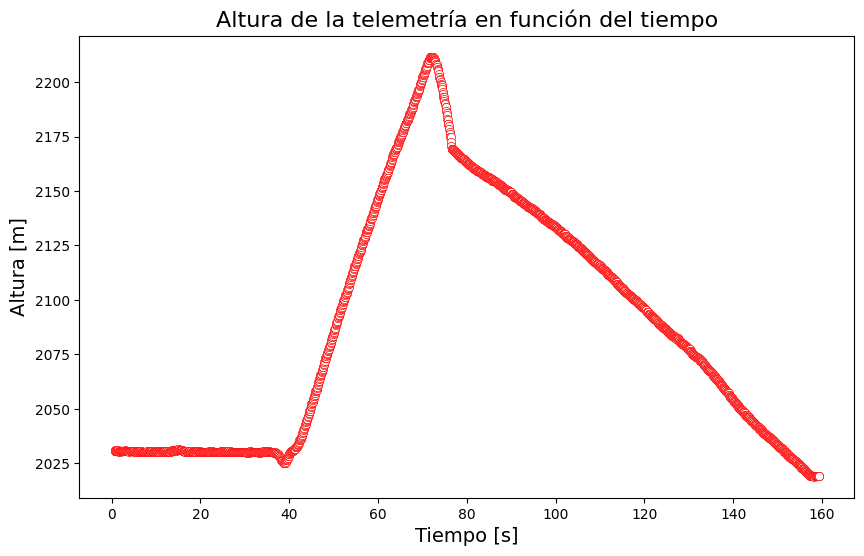

In [8]:
#Graficar valores
fig = plt.figure(figsize=(10, 6))
%notebook inline
plt.plot(Time, altitude,  color="blue")
plt.plot(Time, altitude, "ko", mew = 0.5, mfc = "w", color="red")
plt.xlabel("Tiempo [s]", fontsize=14)
plt.ylabel("Altura [m]", fontsize=14)
plt.title("Altura de la telemetría en función del tiempo", fontsize=16)
plt.savefig('Altura_vs_Tiempo.png')


In [9]:
#Maximo intervalo entre valores
np.max(np.diff(Time))

np.float64(0.09200000000000585)

In [10]:
h = Time[1] - Time[0]
n = len(altitude)
V = altitude

a = np.zeros(n)

for i in range(n):
    if i == 0:
        a[i] = (-V[i+2] + 4*V[i+1] - 3*V[i]) / (2*h)
    elif i == n-1:
        a[i] = (3*V[i] - 4*V[i-1] + V[i-2]) / (2*h)
    elif i == 1 or i == n-2:
        a[i] = (V[i+1] - V[i-1]) / (2*h)
    else:
        a[i] = (-V[i+2] + 8*V[i+1] - 8*V[i-1] + V[i-2]) / (12*h)

C:\Users\armad\AppData\Local\Temp\ipykernel_20744\532897352.py:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ko" (-> color='k'). The keyword argument will take precedence.
  plt.plot(Time, a, "ko", mew = 0.5, mfc = "w", color="red")


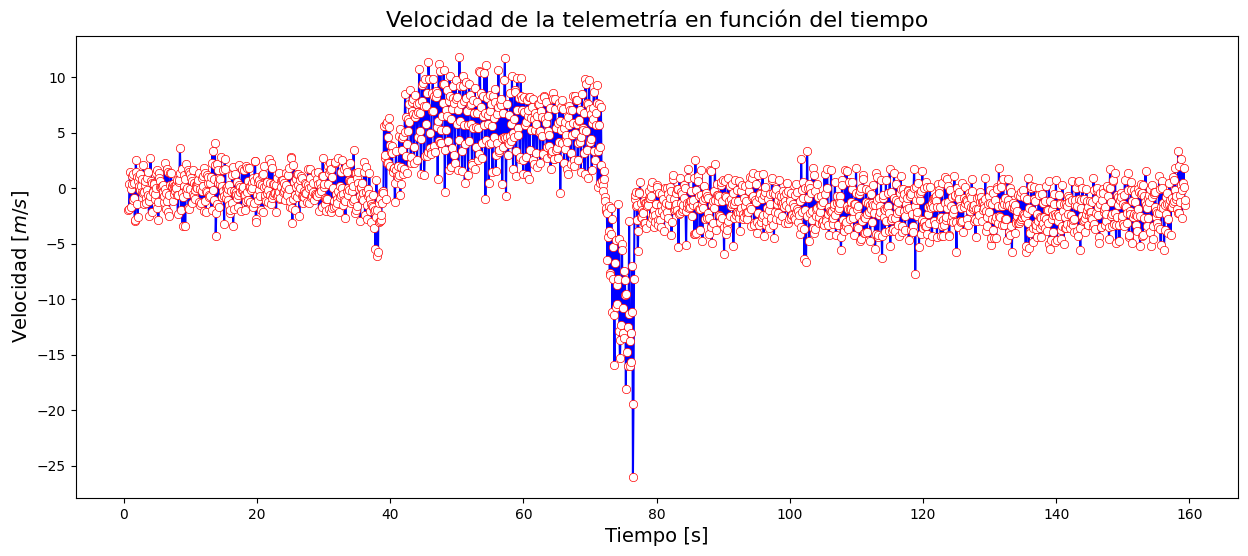

In [11]:
#Graficar derivada
fig = plt.figure(figsize=(15, 6))
plt.plot(Time, a,  color="blue")
plt.plot(Time, a, "ko", mew = 0.5, mfc = "w", color="red")
plt.xlabel("Tiempo [s]", fontsize=14)
plt.ylabel(r"Velocidad [$m/s$]", fontsize=14)
plt.title("Velocidad de la telemetría en función del tiempo", fontsize=16)
plt.savefig('Velocidad_vs_Tiempo.png')

#Guardar datos
a_n = a

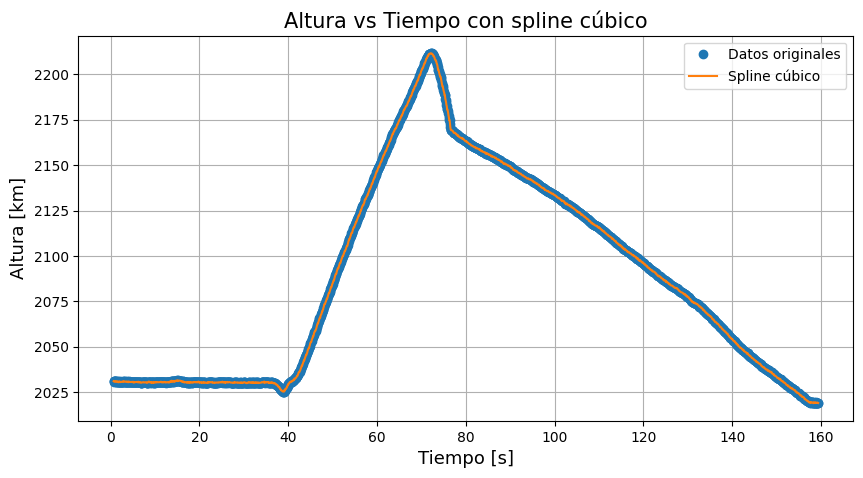

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline

# Cálculo con spline cúbico
cs = CubicSpline(Time, altitude)

# Derivar spline para obtener velocidad
velocity_km_s = cs.derivative()(Time)

# Gráfica: Altura original vs spline
plt.figure(figsize=(10, 5))
plt.plot(Time, altitude, 'o', label='Datos originales')
plt.plot(Time, cs(Time), '-', label='Spline cúbico')
plt.xlabel("Tiempo [s]", fontsize=13)
plt.ylabel("Altura [km]", fontsize=13)
plt.title("Altura vs Tiempo con spline cúbico", fontsize=15)
plt.legend()
plt.grid(True)
plt.savefig('AlturavsTiempo-Interpolada.png')
plt.show()


In [14]:
#Filtrar
w = 9
n_pol = 3
v_f = savgol_filter(altitude, w, n_pol)
v_f_f = savgol_filter(v_f, w, n_pol)
V = v_f_f / 3.6
v_f = v_f_f

#Depurar
for i in range(n):
    if V[i] < 0:
        V[i] = 0
V[0] = 0
V[-1] = 0

Text(0.5, 1.0, 'Altura de la telemetría en función del tiempo')

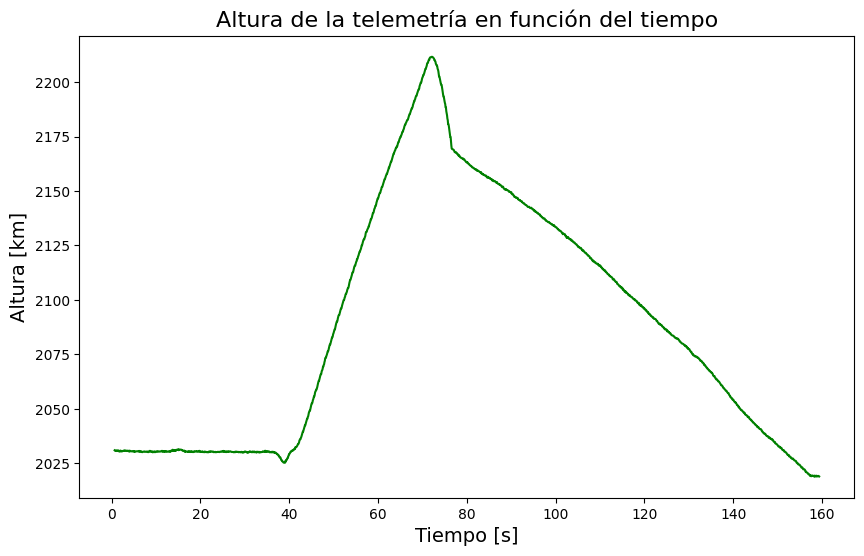

In [15]:
#Graficar datos filtrado
fig = plt.figure(figsize=(10, 6))
%notebook inline
plt.plot(Time, v_f,  color="white", linewidth = 4)
plt.plot(Time, altitude,  color="green")
plt.xlabel("Tiempo [s]", fontsize=14)
plt.ylabel("Altura [km]", fontsize=14)
plt.title("Altura de la telemetría en función del tiempo", fontsize=16)

In [16]:
import numpy as np
from scipy.interpolate import CubicSpline

# Spline cúbico para interpolar los puntos
cs = CubicSpline(Time, altitude)

# Derivar el spline para obtener la velocidad
velocity_m_s = cs.derivative()(Time)

# Convertir a m/s
a = velocity_m_s * 3.600


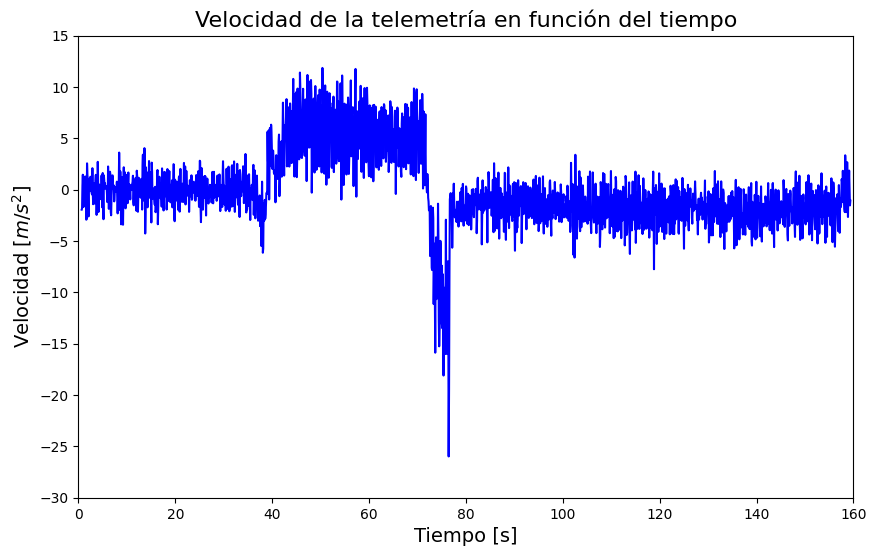

In [17]:
fig = plt.figure(figsize=(10, 6))
plt.plot(Time, a,  color="white", linewidth=6)
plt.plot(Time, a_n, color="blue")
plt.xlabel("Tiempo [s]", fontsize=14)
plt.ylabel(r"Velocidad [$m/s^2$]", fontsize=14)
plt.title("Velocidad de la telemetría en función del tiempo", fontsize=16)

plt.xlim(0, 160)
plt.ylim(-30, 15)

plt.savefig('Velocidad_vs_Tiempo-Interpolada.png')
plt.show()


In [18]:
# Intervalo que nos interesa
t_desde = 65  # segundos
t_hasta = 80 # segundos

# Máscara para manipular los datos
mask = (Time >= t_desde) & (Time <= t_hasta)

descent_rate = np.mean(a[mask])
print(f"Descent rate: {descent_rate:.2f} m/s")

Descent rate: -2.77 m/s


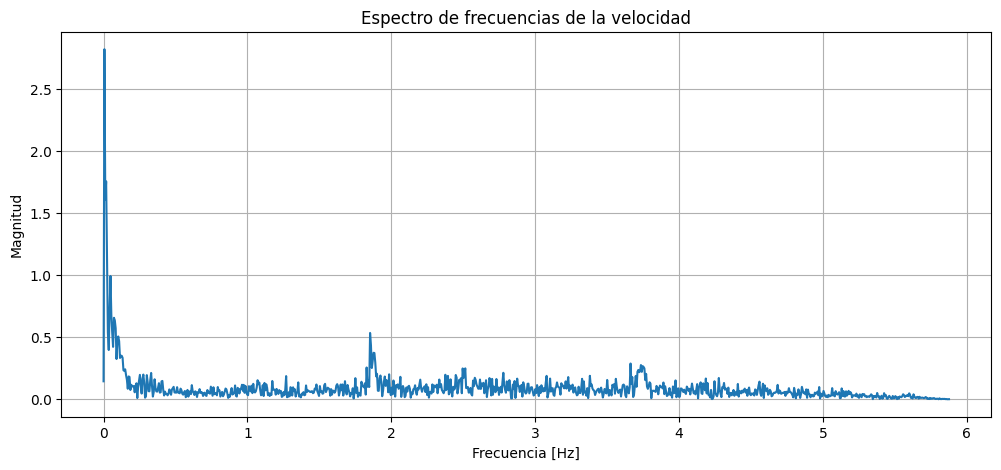

In [19]:
from scipy.fft import fft, fftfreq, ifft
import matplotlib.pyplot as plt

# FFT
# 'a_n' es la señal de velocidad derivada (ruidosa)
vel = a_n
N = len(vel)
T = h  # intervalo de muestreo

# FFT
yf = fft(vel)
xf = fftfreq(N, T)[:N//2]

# Espectro de magnitud
plt.figure(figsize=(12, 5))
plt.plot(xf, 2.0/N * np.abs(yf[:N//2]))
plt.grid()
plt.xlabel("Frecuencia [Hz]")
plt.ylabel("Magnitud")
plt.title("Espectro de frecuencias de la velocidad")
plt.savefig('Espectro De Frecuencias Velocidad.png')
plt.show()


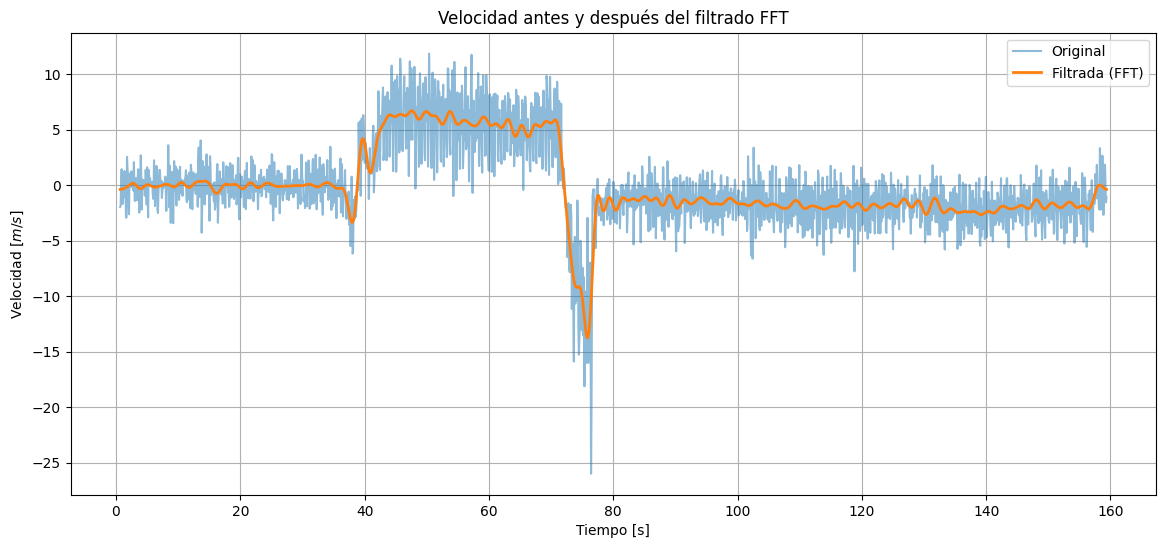

In [31]:
# Copia del filtro aplicado para no usar los datos reales
yf_filtered = yf.copy()

# Corte de frecuencias
cutoff = 0.5

yf_filtered[np.abs(fftfreq(N, T)) > cutoff] = 0

# Reconstruir señal con IFFT
vel_smooth_fft = np.real(ifft(yf_filtered))

# Comparación
plt.figure(figsize=(14, 6))
plt.plot(Time, vel, label='Original', alpha=0.5)
plt.plot(Time, vel_smooth_fft, label='Filtrada (FFT)', linewidth=2)
plt.xlabel("Tiempo [s]")
plt.ylabel(r"Velocidad [$m/s$]")
plt.title("Velocidad antes y después del filtrado FFT")
plt.legend()
plt.grid()
plt.savefig('Comparación velocidades con y sin FFT.png')
plt.show()


Cambio detectado (droptest): t = 71.96 s
Velocidad terminal detectada automáticamente: -1.25 m/s


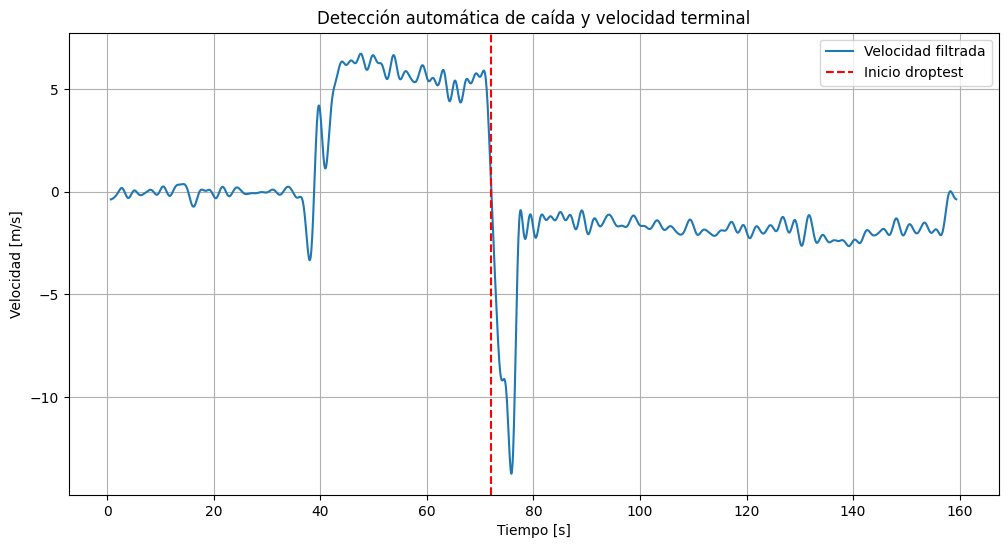

In [32]:
import numpy as np

accel = np.gradient(vel_smooth_fft, h)

idx_droptest = np.argmin(accel)
t_droptest = Time[idx_droptest]
print(f"Cambio detectado (droptest): t = {t_droptest:.2f} s")

vel_despues = vel_smooth_fft[idx_droptest:]
delta_v = np.abs(np.gradient(vel_despues))
umbral_estabilidad = 0.1

window = 20  # número de muestras consecutivas
for i in range(len(delta_v) - window):
    if np.all(delta_v[i:i+window] < umbral_estabilidad):
        idx_inicio_estable = idx_droptest + i
        idx_fin_estable = idx_droptest + i + window
        break

t_estable_ini = Time[idx_inicio_estable]
t_estable_fin = Time[idx_fin_estable]

vel_terminal = np.mean(vel_smooth_fft[idx_inicio_estable:idx_fin_estable])
print(f"Velocidad terminal detectada automáticamente: {vel_terminal:.2f} m/s")

plt.figure(figsize=(12, 6))
plt.plot(Time, vel_smooth_fft, label="Velocidad filtrada")
plt.axvline(t_droptest, color='red', linestyle='--', label='Inicio droptest')
plt.xlabel("Tiempo [s]")
plt.ylabel("Velocidad [m/s]")
plt.title("Detección automática de caída y velocidad terminal")
plt.legend()
plt.grid(True)
plt.savefig('Velocidad_vs_Tiempo - Con FFT.png')
plt.show()


# Diseño de Paracaídas



  Obtaining dependency information for ambiance from https://files.pythonhosted.org/packages/eb/b7/a9543c04d696a4bfe8a4959da6452f926c9766b3c27e9ef89db0a727965b/ambiance-1.3.1-py3-none-any.whl.metadata



[notice] A new release of pip is available: 23.2.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


DISEÑO DE PARACAÍDAS:
-------------------------------------------------------------------------
DISEÑO ORIGINAL (Datos de la bibliografía):
Cd =  0.2
Área del paracaídas:  31.040923621224845 m^2
Diámetro del paracaídas:  7.355432911468308 m
Cota A:  5.1507964383932725
Cota B:  6.026431832920129
-------------------------------------------------------------------------
Diseño sin la FFT:
Cd =  0.527506846317326
Área del paracaídas:  11.768917820851152 m^2
Diámetro del paracaídas:  4.529071597112595 m
Cota A:  3.171577544438351
Cota B:  3.7107457269928705
-------------------------------------------------------------------------
Diseño usando la FFT:
Cd =  2.5886754118517548
Área del paracaídas:  2.3982090206527955 m^2
Diámetro del paracaídas:  2.04448739429304 m
Cota A:  1.4316952537824676
Cota B:  1.675083446925487
-------------------------------------------------------------------------
Outer gores saved in DXF as 'Prueba3.dxf'
Inner gores saved in DXF as 'Prueba2.dxf'


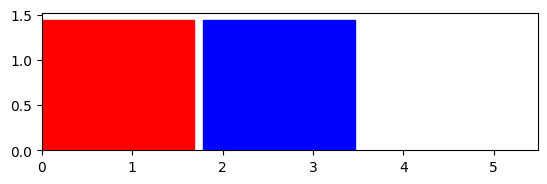

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import ezdxf
from ezdxf.enums import TextEntityAlignment
from ezdxf.render.forms import square
from ezdxf.render.forms import box
import math as mt
!pip install ambiance
from ambiance import Atmosphere

doc = ezdxf.new('R2010')
msp = doc.modelspace()

#Calculadora de diseño

W = 0.481 * 9.81                                      # N (peso)
Cd_Drogue0 = 0.9                                      # coef. arrastre drogue
Vt_Drogue = 4.5                                       # m/s (velocidad terminal)
parachute_altitude = 2350                             # m (altura)
Rho_Drogue = Atmosphere(parachute_altitude)           # Densidad en kg/m³
Rho_final = float(Rho_Drogue.density[0])              # Densidad en kg/m³

So_Parachute = (2 * W) / (Cd_Drogue0 * Rho_final * Vt_Drogue)           # Área del paracaídas de prueba

Cd_final = (2*W)/(So_Parachute*Rho_final*Vt_Drogue**2)                  # Cd obtenido a partir de los datos teóricos
Cd_final0 = (2*W)/(So_Parachute*Rho_final*descent_rate**2)              # Cd obtenido a partir de los datos de la telemetría (con ruido)
Cd_final1 = (2*W)/(So_Parachute*Rho_final*vel_terminal**2)              # Cd obtenido a partir de los datos de la telemetría usando la TTF (sin ruido)

So_Parachute0 = (2*W)/(Cd_final0*Rho_final*descent_rate**2)             # Área calculada con los datos de la telemetría (con ruido)
So_Parachute1 = (2*W)/(Cd_final1*Rho_final*vel_terminal**2)             # Área calculada con los datos de la telemetría usando la TTF (sin ruido)

# Comparación entre los 3 datos de área usando los respectivos CDs calculados y la velocidad terminal calculada con la TTF
So_final = (2*W)/(Cd_final*Rho_final*vel_terminal**2)
So_final0 = (2*W)/(Cd_final0*Rho_final*vel_terminal**2)
So_final1 = (2*W)/(Cd_final1*Rho_final*vel_terminal**2)

# Relación de aspecto de diseño para el paracaídas cruz usado
AR = 1.17                                              #(-)

# Diámetros nominales
ND = mt.sqrt((4*So_final)/(mt.pi))
ND_0 = mt.sqrt((4*So_final0)/(mt.pi))
ND_1 = mt.sqrt((4*So_final1)/(mt.pi))

# Diámetros construidos
ConsD = ND*AR
ConsD0 = ND_0*AR
ConsD1 = ND_1*AR

# Dimensión de cota B para el cálculo de la geometría
B = mt.sqrt(So_final*1.17)
B0 = mt.sqrt(So_final0*1.17)
B1 = mt.sqrt(So_final1*1.17)
# Dimensión de cota A para el cálculo de la geometría
A = B/1.17
A0 = B0/1.17
A1 = B1/1.17

print('DISEÑO DE PARACAÍDAS:')

print('-------------------------------------------------------------------------')

print('DISEÑO ORIGINAL (Datos de la bibliografía):')
print('Cd = ', Cd_final)
print('Área del paracaídas: ', So_final, 'm^2')
print('Diámetro del paracaídas: ', ConsD, 'm')
print('Cota A: ', A )
print('Cota B: ', B)

print('-------------------------------------------------------------------------')

print('Diseño sin la FFT:')
print('Cd = ', Cd_final0 )
print('Área del paracaídas: ', So_final0, 'm^2')
print('Diámetro del paracaídas: ', ConsD0, 'm')
print('Cota A: ', A0 )
print('Cota B: ', B0)


print('-------------------------------------------------------------------------')

print('Diseño usando la FFT:')
print('Cd = ', Cd_final1 )
print('Área del paracaídas: ', So_final1, 'm^2')
print('Diámetro del paracaídas: ', ConsD1, 'm')
print('Cota A: ', A1)
print('Cota B: ', B1)

print('-------------------------------------------------------------------------')

# Número de gores para la construcción del canopy
Number_of_gores = int(input('Number of gores: '))

seam_allowance = 0.003*2

Width = B1+seam_allowance                #0.005 es el márgen de costura
Length = (B1/AR)+seam_allowance          #0.005 es el márgen de costura

# Gores internos
inner_gores = int(input('Number of inner gores: '))
outer_gores = int(input('Number of outer gores: '))

# Gores externos
Length_outer_gores = (Width-Length)/2

if Number_of_gores <= 12:
    center_x = 0
    center_y1 = 0
    for i in range(0, outer_gores):
        gore_width = Width * 1000
        gore_length = Length_outer_gores * 1000

        # Gores - outers
        half_width = gore_width / 2
        half_length = gore_length / 2
        Outer_Gores = [
            (center_x - half_width, center_y1 - half_length),
            (center_x + half_width, center_y1 - half_length),
            (center_x + half_width, center_y1 + half_length),
            (center_x - half_width, center_y1 + half_length),
            (center_x - half_width, center_y1 - half_length),
        ]

        center_y1 += gore_length+10


        msp.add_lwpolyline(Outer_Gores, close=True)
        doc.saveas('Outer_gores.dxf')
    print("Outer gores saved in DXF as 'Prueba3.dxf'")

    center_x1 = 0
    center_y2 = 0

    doc2 = ezdxf.new()
    msp2 = doc2.modelspace()

    for a in range(0,inner_gores):
        gore_width = (Length)*1000
        gore_length = (Length)*1000

        half_width = gore_width / 2
        half_length = gore_length / 2
        Gore = [
            (center_x1 - half_width, center_y2 - half_length),
            (center_x1 + half_width, center_y2 - half_length),
            (center_x1 + half_width, center_y2 + half_length),
            (center_x1 - half_width, center_y2 + half_length),
            (center_x1 - half_width, center_y2 - half_length),
        ]

        msp2.add_lwpolyline(Gore, close=True)

        center_x1 += gore_length+10

        doc2.saveas('Inner_gores.dxf')
    print("Inner gores saved in DXF as 'Prueba2.dxf'")

# Ancho y alto de la tela usada
Width_fabric = 1.524                      #m
Length_fabric = 0.9144                    #m

# Yardas lineales de la tela
Fabric_Yd = 6                             #m

fig, ax = plt.subplots()

# Área total de cada rectangulo del paracaídas
Gore_row1 = plt.Rectangle((0, 0), Width, Length, color='red')
Gore_row2 = plt.Rectangle((Width + 0.1, 0), Width, Length, color='blue')

ax.add_patch(Gore_row1)
ax.add_patch(Gore_row2)

ax.set_xlim(0, Length_fabric*Fabric_Yd)
ax.set_ylim(0, Width_fabric)

plt.gca().set_aspect('equal', adjustable='box')
plt.show()
